In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
source_data=pd.read_csv("10results.csv")
target_data=pd.read_csv("10inc_results.csv")

In [36]:
source_data.head()

,Row Index,Energy,Variance,Amplitude,target
0,0,32.925595,0.182389,1.866884,0
1,1,90.579066,0.501222,2.953461,0
2,2,235.985558,1.003402,3.583484,0
3,3,40.987416,0.227449,2.248929,0
4,4,236.592638,1.304277,6.541649,0


In [37]:
target_data.head()

,Row Index,Energy,Variance,Amplitude,target
0,0,0.088683,0.000493,0.167585,0
1,1,0.177878,0.000986,0.148101,0
2,2,0.737887,0.003796,0.200320,0
3,3,0.281076,0.001517,0.127189,0
4,4,0.388717,0.002138,0.181328,0


In [38]:
source_data=source_data.drop('Row Index',axis=1)

In [39]:
source_data.head()

,Energy,Variance,Amplitude,target
0,32.925595,0.182389,1.866884,0
1,90.579066,0.501222,2.953461,0
2,235.985558,1.003402,3.583484,0
3,40.987416,0.227449,2.248929,0
4,236.592638,1.304277,6.541649,0


In [40]:
target_data=target_data.drop('Row Index',axis=1)

In [41]:
target_data.head()

,Energy,Variance,Amplitude,target
0,0.088683,0.000493,0.167585,0
1,0.177878,0.000986,0.148101,0
2,0.737887,0.003796,0.200320,0
3,0.281076,0.001517,0.127189,0
4,0.388717,0.002138,0.181328,0


In [42]:
# Check for missing values
print("Missing values in source data:")
print(source_data.isnull().sum())

Missing values in source data:
Energy       0
Variance     0
Amplitude    0
target       0
dtype: int64


In [43]:
print("Missing values in target data:")
print(target_data.isnull().sum())

Missing values in target data:
Energy       0
Variance     0
Amplitude    0
target       0
dtype: int64


In [44]:
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
    return is_outlier

def plot_boxplots(data, title):
    plt.figure(figsize=(10, 6))
    data.boxplot()
    plt.title(title)
    plt.yscale('log')  # Using log scale for better visualization
    plt.tight_layout()
    plt.show()


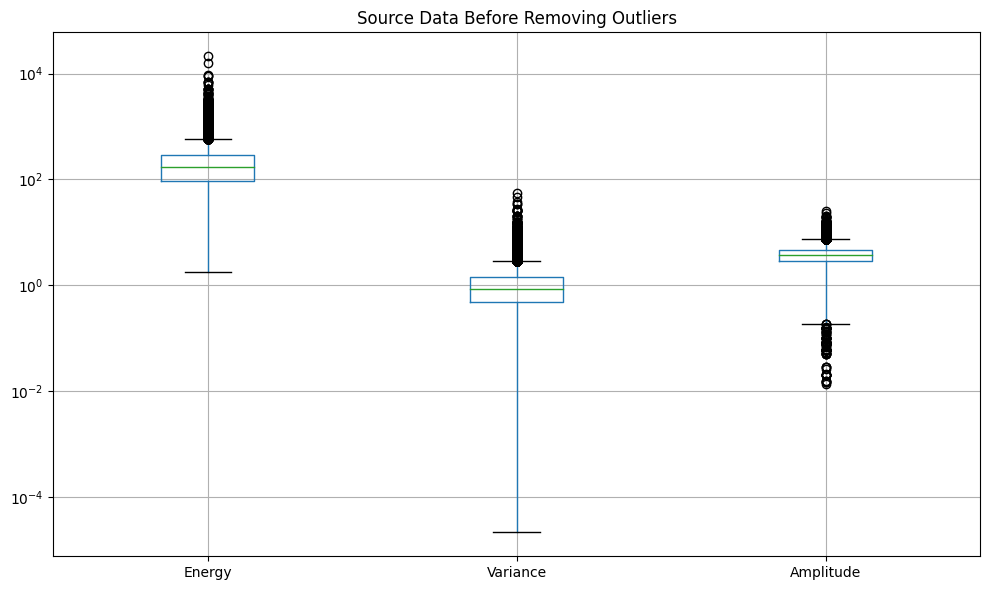

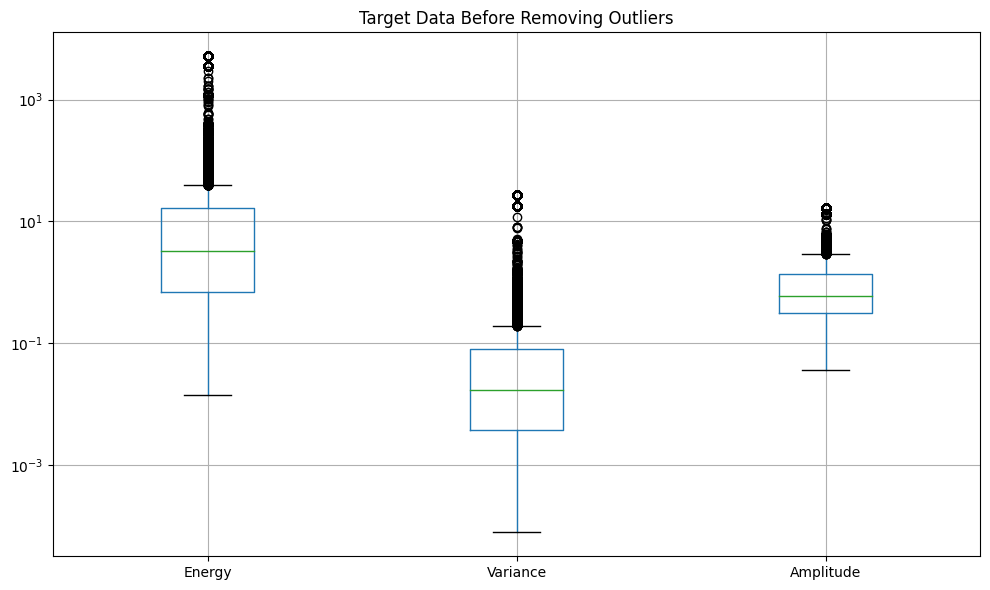

In [45]:
# Plot boxplots before removing outliers
plot_boxplots(source_data.iloc[:, :-1], "Source Data Before Removing Outliers")
plot_boxplots(target_data.iloc[:, :-1], "Target Data Before Removing Outliers")

In [46]:
# Detect outliers
source_outliers = detect_outliers(source_data.iloc[:, :-1])
target_outliers = detect_outliers(target_data.iloc[:, :-1])

In [47]:
# Remove outliers
source_data_clean = source_data[~source_outliers]
target_data_clean = target_data[~target_outliers]

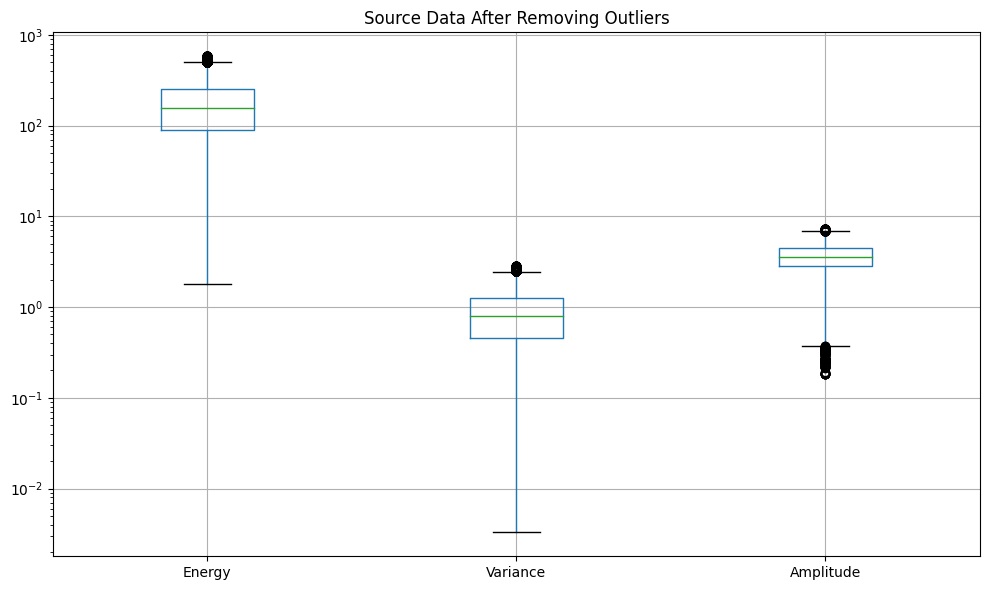

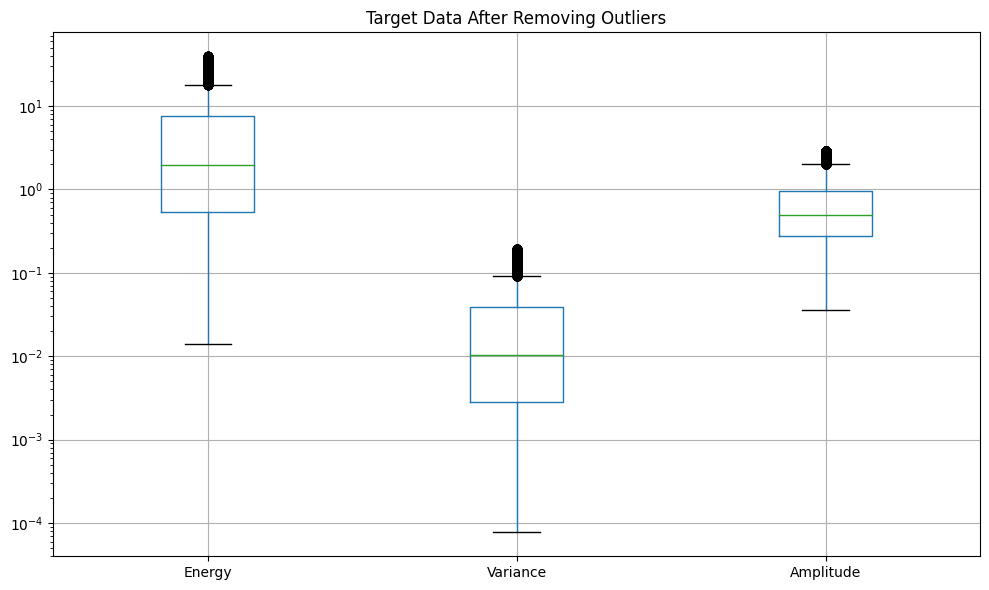

In [48]:
# Plot boxplots after removing outliers
plot_boxplots(source_data_clean.iloc[:, :-1], "Source Data After Removing Outliers")
plot_boxplots(target_data_clean.iloc[:, :-1], "Target Data After Removing Outliers")

In [49]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
source_data_clean.iloc[:, :-1] = scaler.fit_transform(source_data_clean.iloc[:, :-1])
target_data_clean.iloc[:, :-1] = scaler.fit_transform(target_data_clean.iloc[:, :-1])

C:\Users\Sai Teja\AppData\Local\Temp\ipykernel_11240\1048857592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  source_data_clean.iloc[:, :-1] = scaler.fit_transform(source_data_clean.iloc[:, :-1])
C:\Users\Sai Teja\AppData\Local\Temp\ipykernel_11240\1048857592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data_clean.iloc[:, :-1] = scaler.fit_transform(target_data_clean.iloc[:, :-1])


In [50]:
# Print max and min values after Min-Max scaling
print("\nSource data after preprocessing:")
print("Max values:")
print(source_data_clean.iloc[:, :-1].max())
print("Min values:")
print(source_data_clean.iloc[:, :-1].min())


Source data after preprocessing:
Max values:
Energy       1.0
Variance     1.0
Amplitude    1.0
dtype: float64
Min values:
Energy       0.0
Variance     0.0
Amplitude    0.0
dtype: float64


In [51]:
print("\nTarget data after preprocessing:")
print("Max values:")
print(target_data_clean.iloc[:, :-1].max())
print("Min values:")
print(target_data_clean.iloc[:, :-1].min())


Target data after preprocessing:
Max values:
Energy       1.0
Variance     1.0
Amplitude    1.0
dtype: float64
Min values:
Energy       0.0
Variance     0.0
Amplitude    0.0
dtype: float64


In [52]:
# Save the cleaned data to CSV files
source_data_clean.to_csv('source_data_clean.csv', index=False)
target_data_clean.to_csv('target_data_clean.csv', index=False)

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from scipy.linalg import svd

# Load datasets from CSV files
source_file = 'source_data_clean.csv'  # Replace with your source CSV file path
target_file = 'target_data_clean.csv'  # Replace with your target CSV file path

# Load data
df_source = pd.read_csv(source_file)
df_target = pd.read_csv(target_file)

# Assume the last column is the label and the rest are features
X_source = df_source.iloc[:, :-1].values
y_source = df_source.iloc[:, -1].values
X_target = df_target.iloc[:, :-1].values
y_target = df_target.iloc[:, -1].values


def align_features(source, target):
    """Align target features to source features using CORAL."""
    cov_source = np.cov(source, rowvar=False)
    cov_target = np.cov(target, rowvar=False)

    # Singular Value Decomposition (SVD)
    U_s, _, _ = svd(cov_source)
    U_t, _, _ = svd(cov_target)

    # Align target covariance to source covariance
    aligned_target = target @ U_s @ np.linalg.pinv(U_t)
    return aligned_target

# Align target features to source features
X_target_aligned = align_features(X_source, X_target)

# Convert labels to one-hot encoding
y_source = to_categorical(y_source)
y_target = to_categorical(y_target)

# Build a neural network model
input_shape = X_source.shape[1]
model_input = Input(shape=(input_shape,))
x = Dense(128, activation='relu')(model_input)
x = Dense(64, activation='relu')(x)
model_output = Dense(5, activation='softmax')(x)
model = Model(inputs=model_input, outputs=model_output)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on source data
model.fit(X_source, y_source, epochs=10, batch_size=32, validation_split=0.2)

# Fine-tune on target data
model.fit(X_target_aligned, y_target, epochs=10, batch_size=32, validation_split=0.2)

# Predict on aligned target data
y_pred_probs = model.predict(X_target_aligned)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_target from one-hot encoding to class labels
y_target_labels = np.argmax(y_target, axis=1)

# Evaluate the model on target data
print("Classification Report:")
print(classification_report(y_target_labels, y_pred))

Epoch 1/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3369 - loss: 1.4790 - val_accuracy: 0.1377 - val_loss: 2.0333
Epoch 2/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4002 - loss: 1.3868 - val_accuracy: 0.1421 - val_loss: 2.0381
Epoch 3/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4168 - loss: 1.3625 - val_accuracy: 0.1781 - val_loss: 2.0353
Epoch 4/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4233 - loss: 1.3429 - val_accuracy: 0.1545 - val_loss: 2.0825
Epoch 5/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4373 - loss: 1.3350 - val_accuracy: 0.0851 - val_loss: 2.1118
Epoch 6/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4383 - loss: 1.3265 - val_accuracy: 0.1700 - val_loss: 1.9967
Epoch 7/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4370 - loss: 1.3253 - val_accuracy: 0.0946 - val_loss: 2.1853
Epoch 8/10
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4373 - loss: 1.3262 - 

Training on source data:
Epoch 1/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3406 - loss: 1.4900 - val_accuracy: 0.4148 - val_loss: 1.3898 - learning_rate: 0.0010
Epoch 2/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4032 - loss: 1.4047 - val_accuracy: 0.4180 - val_loss: 1.3686 - learning_rate: 0.0010
Epoch 3/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4057 - loss: 1.3929 - val_accuracy: 0.4240 - val_loss: 1.3580 - learning_rate: 0.0010
Epoch 4/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4215 - loss: 1.3758 - val_accuracy: 0.4350 - val_loss: 1.3447 - learning_rate: 0.0010
Epoch 5/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4262 - loss: 1.3671 - val_accuracy: 0.4433 - val_loss: 1.3323 - learning_rate: 0.0010
Epoch 6/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4263 - loss: 1.3647 - val_accuracy: 0.4445 - val_loss: 1.3255 - learning_rate: 0.0010
Epoch 7/50
1154/1154 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/st

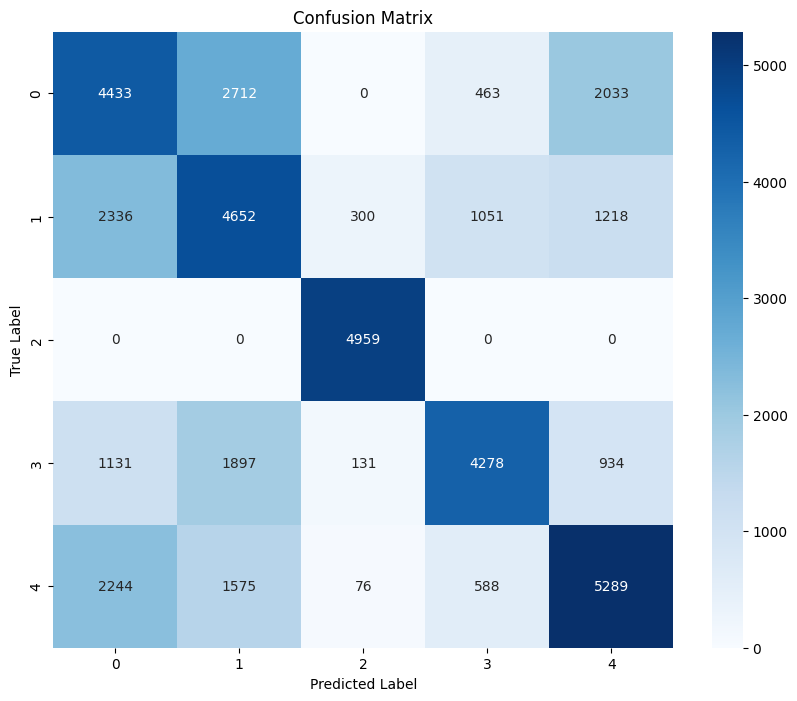

In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from scipy.linalg import svd
from sklearn.model_selection import train_test_split

# Load datasets from CSV files
source_file = 'source_data_clean.csv'
target_file = 'target_data_clean.csv'

# Load data
df_source = pd.read_csv(source_file)
df_target = pd.read_csv(target_file)

# Assume the last column is the label and the rest are features
X_source = df_source.iloc[:, :-1].values
y_source = df_source.iloc[:, -1].values
X_target = df_target.iloc[:, :-1].values
y_target = df_target.iloc[:, -1].values

def align_features(source, target):
    """Align target features to source features using CORAL."""
    cov_source = np.cov(source, rowvar=False)
    cov_target = np.cov(target, rowvar=False)
    
    # Singular Value Decomposition (SVD)
    U_s, _, _ = svd(cov_source)
    U_t, _, _ = svd(cov_target)
    
    # Align target covariance to source covariance
    aligned_target = target @ U_s @ np.linalg.pinv(U_t)
    return aligned_target

# Standardize the data
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# Align target features to source features
X_target_aligned = align_features(X_source, X_target)

# Convert labels to one-hot encoding
y_source = to_categorical(y_source)
y_target = to_categorical(y_target)

# Split the data into train and validation sets
X_source_train, X_source_val, y_source_train, y_source_val = train_test_split(X_source, y_source, test_size=0.2, random_state=42)
X_target_train, X_target_val, y_target_train, y_target_val = train_test_split(X_target_aligned, y_target, test_size=0.2, random_state=42)

# Build a neural network model
input_shape = X_source.shape[1]
model_input = Input(shape=(input_shape,))
x = Dense(256, activation='relu')(model_input)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
model_output = Dense(y_source.shape[1], activation='softmax')(x)
model = Model(inputs=model_input, outputs=model_output)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model on source data
print("Training on source data:")
model.fit(X_source_train, y_source_train, 
          epochs=50, 
          batch_size=32, 
          validation_data=(X_source_val, y_source_val),
          callbacks=[early_stopping, reduce_lr],
          verbose=1)

# Fine-tune on target data
print("\nFine-tuning on target data:")
model.fit(X_target_train, y_target_train, 
          epochs=50, 
          batch_size=32, 
          validation_data=(X_target_val, y_target_val),
          callbacks=[early_stopping, reduce_lr],
          verbose=1)

# Predict on aligned target data
y_pred_probs = model.predict(X_target_aligned)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_target from one-hot encoding to class labels
y_target_labels = np.argmax(y_target, axis=1)

# Evaluate the model on target data
print("\nClassification Report:")
print(classification_report(y_target_labels, y_pred))

# Calculate and print confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_target_labels, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Training on source data:
Epoch 1/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3111 - loss: 2.0753 - val_accuracy: 0.4077 - val_loss: 1.6465 - learning_rate: 0.0010
Epoch 2/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3657 - loss: 1.6832 - val_accuracy: 0.4039 - val_loss: 1.5560 - learning_rate: 0.0010
Epoch 3/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3863 - loss: 1.5774 - val_accuracy: 0.4166 - val_loss: 1.4881 - learning_rate: 0.0010
Epoch 4/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3974 - loss: 1.5199 - val_accuracy: 0.4233 - val_loss: 1.4419 - learning_rate: 0.0010
Epoch 5/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3996 - loss: 1.4788 - val_accuracy: 0.4218 - val_loss: 1.4156 - learning_rate: 0.0010
Epoch 6/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4102 - loss: 1.4492 - val_accuracy: 0.4110 - val_loss: 1.4107 - learning_rate: 0.0010
Epoch 7/100
577/577 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - ac

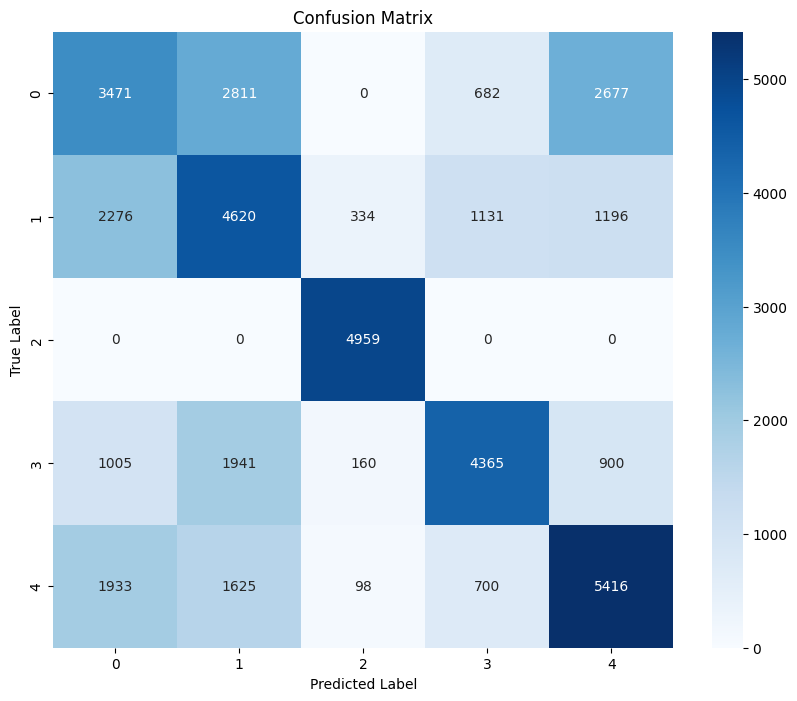

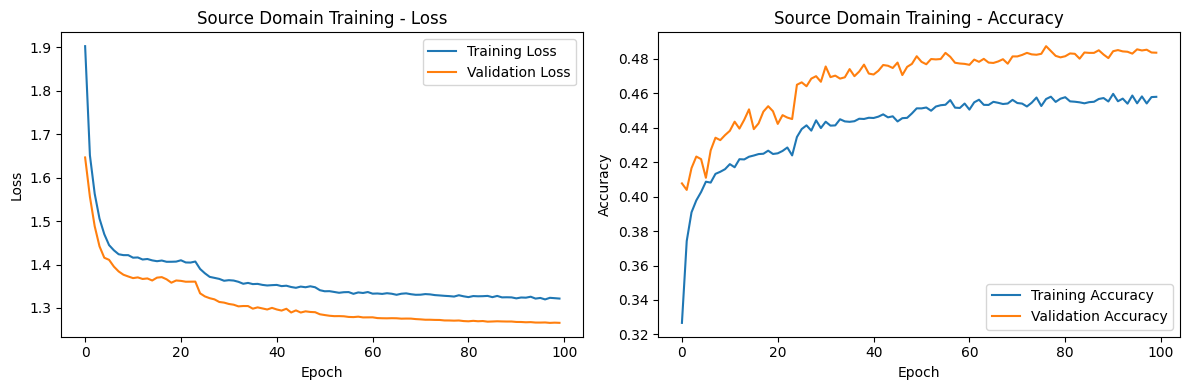

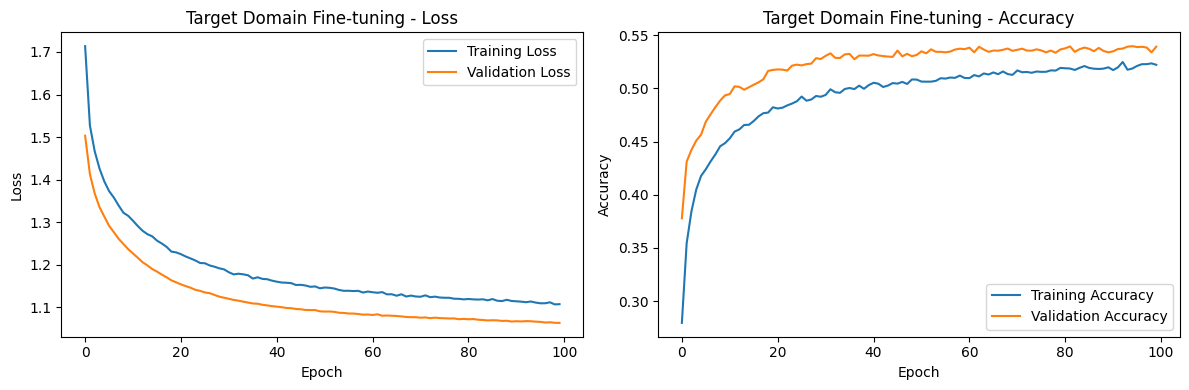

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from scipy.linalg import svd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from CSV files
source_file = 'source_data_clean.csv'
target_file = 'target_data_clean.csv'

# Load data
df_source = pd.read_csv(source_file)
df_target = pd.read_csv(target_file)

# Assume the last column is the label and the rest are features
X_source = df_source.iloc[:, :-1].values
y_source = df_source.iloc[:, -1].values
X_target = df_target.iloc[:, :-1].values
y_target = df_target.iloc[:, -1].values

def align_features(source, target):
    """Align target features to source features using CORAL."""
    cov_source = np.cov(source, rowvar=False)
    cov_target = np.cov(target, rowvar=False)
    
    U_s, _, _ = svd(cov_source)
    U_t, _, _ = svd(cov_target)
    
    aligned_target = target @ U_s @ np.linalg.pinv(U_t)
    return aligned_target

# Standardize the data
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# Align target features to source features
X_target_aligned = align_features(X_source, X_target)

# Convert labels to one-hot encoding
y_source = to_categorical(y_source)
y_target = to_categorical(y_target)

# Split the data into train and validation sets
X_source_train, X_source_val, y_source_train, y_source_val = train_test_split(X_source, y_source, test_size=0.2, random_state=42)
X_target_train, X_target_val, y_target_train, y_target_val = train_test_split(X_target_aligned, y_target, test_size=0.2, random_state=42)

# Build a neural network model
def create_model(input_shape, num_classes):
    inputs = Input(shape=(input_shape,))
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.001))(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    x = Dense(64, activation='relu', kernel_regularizer=l2(0.001))(x)
    x = BatchNormalization()(x)
    x = Dropout(0.4)(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

input_shape = X_source.shape[1]
num_classes = y_source.shape[1]
model = create_model(input_shape, num_classes)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model on source data
print("Training on source data:")
history_source = model.fit(X_source_train, y_source_train, 
          epochs=100, 
          batch_size=64, 
          validation_data=(X_source_val, y_source_val),
          callbacks=[early_stopping, reduce_lr],
          verbose=1)

# Fine-tune on target data
print("\nFine-tuning on target data:")
history_target = model.fit(X_target_train, y_target_train, 
          epochs=100, 
          batch_size=64, 
          validation_data=(X_target_val, y_target_val),
          callbacks=[early_stopping, reduce_lr],
          verbose=1)

# Predict on aligned target data
y_pred_probs = model.predict(X_target_aligned)
y_pred = np.argmax(y_pred_probs, axis=1)

# Convert y_target from one-hot encoding to class labels
y_target_labels = np.argmax(y_target, axis=1)

# Evaluate the model on target data
print("\nClassification Report:")
print(classification_report(y_target_labels, y_pred))

# Calculate and print confusion matrix
cm = confusion_matrix(y_target_labels, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

plot_history(history_source, 'Source Domain Training')
plot_history(history_target, 'Target Domain Fine-tuning')


Training on Energy subset:

Training on Variance subset:

Training on Amplitude subset:

Training on Energy_Variance subset:

Training on Energy_Amplitude subset:

Training on Variance_Amplitude subset:

Training on All_Features subset:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1894
           1       0.69      0.66      0.67      1996
           2       1.00      1.00      1.00       986
           3       0.88      0.99      0.93      1652
           4       0.70      0.65      0.68      1932

    accuracy                           0.84      8460
   macro avg       0.85      0.86      0.86      8460
weighted avg       0.83      0.84      0.84      8460



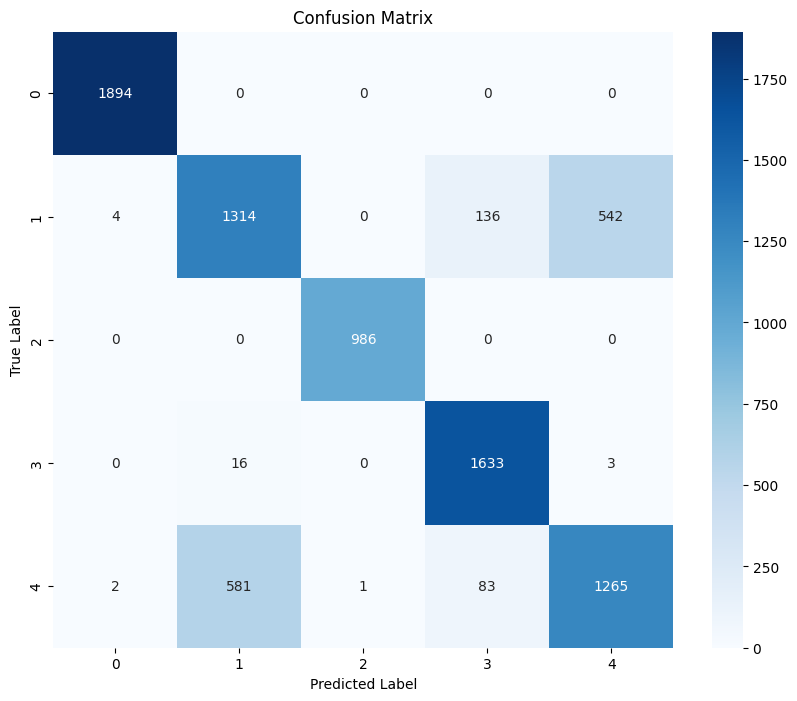

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from CSV files
source_file = 'source_data_clean.csv'
target_file = 'target_data_clean.csv'

# Load data
df_source = pd.read_csv(source_file)
df_target = pd.read_csv(target_file)

# Assume the last column is the label and the rest are features
X_source = df_source[['Energy', 'Variance', 'Amplitude']]
y_source = df_source.iloc[:, -1]
X_target = df_target[['Energy', 'Variance', 'Amplitude']]
y_target = df_target.iloc[:, -1]

def align_features(source, target):
    """Align target features to source features using CORAL."""
    cov_source = np.cov(source, rowvar=False)
    cov_target = np.cov(target, rowvar=False)
    
    # Singular Value Decomposition (SVD)
    U_s, _, _ = svd(cov_source)
    U_t, _, _ = svd(cov_target)
    
    # Align target covariance to source covariance
    aligned_target = target @ U_s @ np.linalg.pinv(U_t)
    return aligned_target

# Standardize the data
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# Align target features to source features
X_target_aligned = align_features(X_source, X_target)

# Split the data into train and validation sets
X_source_train, X_source_val, y_source_train, y_source_val = train_test_split(X_source, y_source, test_size=0.2, random_state=42)
X_target_train, X_target_val, y_target_train, y_target_val = train_test_split(X_target_aligned, y_target, test_size=0.2, random_state=42)

# Create subsets of data
subsets = [
    ('Energy', [0]),
    ('Variance', [1]),
    ('Amplitude', [2]),
    ('Energy_Variance', [0, 1]),
    ('Energy_Amplitude', [0, 2]),
    ('Variance_Amplitude', [1, 2]),
    ('All_Features', [0, 1, 2])
]

# Initialize list to store models
models = []

# Train models on each subset
for name, indices in subsets:
    print(f"\nTraining on {name} subset:")
    
    X_source_subset = X_source_train[:, indices]
    X_target_subset = X_target_train[:, indices]
    
    # Ensure 2D arrays
    if X_source_subset.ndim == 1:
        X_source_subset = X_source_subset.reshape(-1, 1)
    if X_target_subset.ndim == 1:
        X_target_subset = X_target_subset.reshape(-1, 1)
    
    # Train on source data
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_source_subset, y_source_train)
    
    # Fine-tune on target data
    rf_model.fit(X_target_subset, y_target_train)
    
    models.append((name, rf_model, indices))

# Make predictions using all models
predictions = []
for name, model, indices in models:
    X_target_val_subset = X_target_val[:, indices]
    if X_target_val_subset.ndim == 1:
        X_target_val_subset = X_target_val_subset.reshape(-1, 1)
    pred = model.predict(X_target_val_subset)
    predictions.append(pred)

# Combine predictions (majority voting)
final_predictions = np.array([np.bincount(pred).argmax() for pred in zip(*predictions)])

# Evaluate the combined model on target data
print("\nClassification Report:")
print(classification_report(y_target_val, final_predictions))

# Calculate and print confusion matrix
cm = confusion_matrix(y_target_val, final_predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Training on Energy subset:

Training on Variance subset:

Training on Amplitude subset:

Training on Energy_Variance subset:

Training on Energy_Amplitude subset:

Training on Variance_Amplitude subset:

Training on All_Features subset:

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9641
           1       1.00      1.00      1.00      9557
           2       1.00      1.00      1.00      4959
           3       1.00      1.00      1.00      8371
           4       1.00      1.00      1.00      9772

    accuracy                           1.00     42300
   macro avg       1.00      1.00      1.00     42300
weighted avg       1.00      1.00      1.00     42300



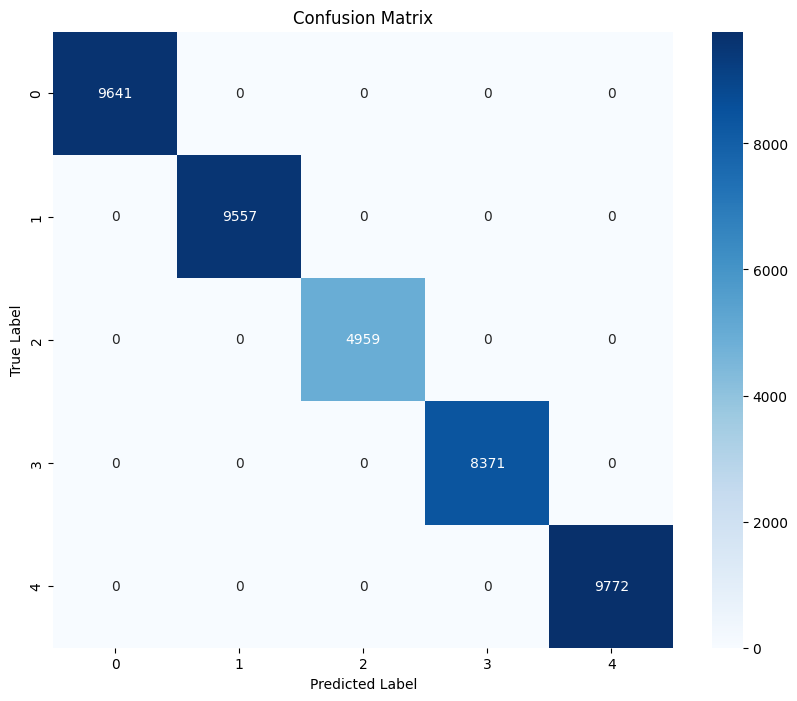


Predictions saved to 'target_data_with_predictions.csv'


In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets from CSV files
source_file = 'source_data_clean.csv'
target_file = 'target_data_clean.csv'

# Load data
df_source = pd.read_csv(source_file)
df_target = pd.read_csv(target_file)

# Assume the last column is the label and the rest are features
X_source = df_source[['Energy', 'Variance', 'Amplitude']]
y_source = df_source.iloc[:, -1]
X_target = df_target[['Energy', 'Variance', 'Amplitude']]
y_target = df_target.iloc[:, -1]

def align_features(source, target):
    """Align target features to source features using CORAL."""
    cov_source = np.cov(source, rowvar=False)
    cov_target = np.cov(target, rowvar=False)
    
    # Singular Value Decomposition (SVD)
    U_s, _, _ = svd(cov_source)
    U_t, _, _ = svd(cov_target)

    # Align target covariance to source covariance
    aligned_target = target @ U_s @ np.linalg.pinv(U_t)
    return aligned_target

# Standardize the data
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# Align target features to source features
X_target_aligned = align_features(X_source, X_target)

# Create subsets of data
subsets = [
    ('Energy', [0]),
    ('Variance', [1]),
    ('Amplitude', [2]),
    ('Energy_Variance', [0, 1]),
    ('Energy_Amplitude', [0, 2]),
    ('Variance_Amplitude', [1, 2]),
    ('All_Features', [0, 1, 2])
]

# Initialize list to store models
models = []

# Train models on each subset
for name, indices in subsets:
    print(f"\nTraining on {name} subset:")
    
    X_source_subset = X_source[:, indices]
    X_target_subset = X_target_aligned[:, indices]
    
    # Ensure 2D arrays
    if X_source_subset.ndim == 1:
        X_source_subset = X_source_subset.reshape(-1, 1)
    if X_target_subset.ndim == 1:
        X_target_subset = X_target_subset.reshape(-1, 1)
    
    # Train on source data
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_source_subset, y_source)
    
    # Fine-tune on target data
    rf_model.fit(X_target_subset, y_target)
    
    models.append((name, rf_model, indices))

# Make predictions using all models on the full target data
predictions = []
for name, model, indices in models:
    X_target_subset = X_target_aligned[:, indices]
    if X_target_subset.ndim == 1:
        X_target_subset = X_target_subset.reshape(-1, 1)
    pred = model.predict(X_target_subset)
    predictions.append(pred)

# Combine predictions (majority voting)
final_predictions = np.array([np.bincount(pred).argmax() for pred in zip(*predictions)])

# Evaluate the combined model on the full target data
print("\nClassification Report:")
print(classification_report(y_target, final_predictions))

# Calculate and print confusion matrix
cm = confusion_matrix(y_target, final_predictions)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Save predictions to a CSV file
df_target['Predicted_Label'] = final_predictions
df_target.to_csv('target_data_with_predictions.csv', index=False)
print("\nPredictions saved to 'target_data_with_predictions.csv'")

In [67]:
# After loading the data
print(f"Number of samples in source data: {len(df_source)}")
print(f"Number of samples in target data: {len(df_target)}")

# After preparing features and labels
print(f"Shape of X_target: {X_target.shape}")
print(f"Shape of y_target: {y_target.shape}")

# After making predictions
print(f"Number of predictions: {len(final_predictions)}")

# Check for any NaN or infinite values
print(f"NaN values in X_target: {np.isnan(X_target).sum()}")
print(f"Infinite values in X_target: {np.isinf(X_target).sum()}")

# Print unique labels
print(f"Unique labels in y_target: {np.unique(y_target)}")
print(f"Unique labels in predictions: {np.unique(final_predictions)}")

Number of samples in source data: 46160
Number of samples in target data: 42300
Shape of X_target: (42300, 3)
Shape of y_target: (42300,)
Number of predictions: 42300
NaN values in X_target: 0
Infinite values in X_target: 0
Unique labels in y_target: [0 1 2 3 4]
Unique labels in predictions: [0 1 2 3 4]


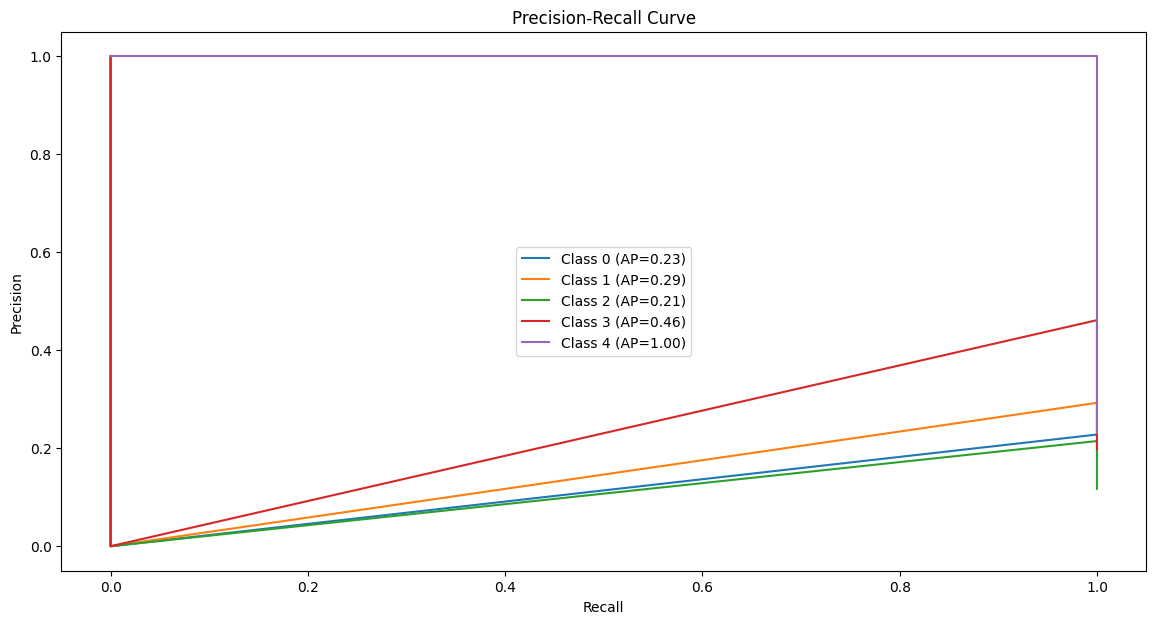

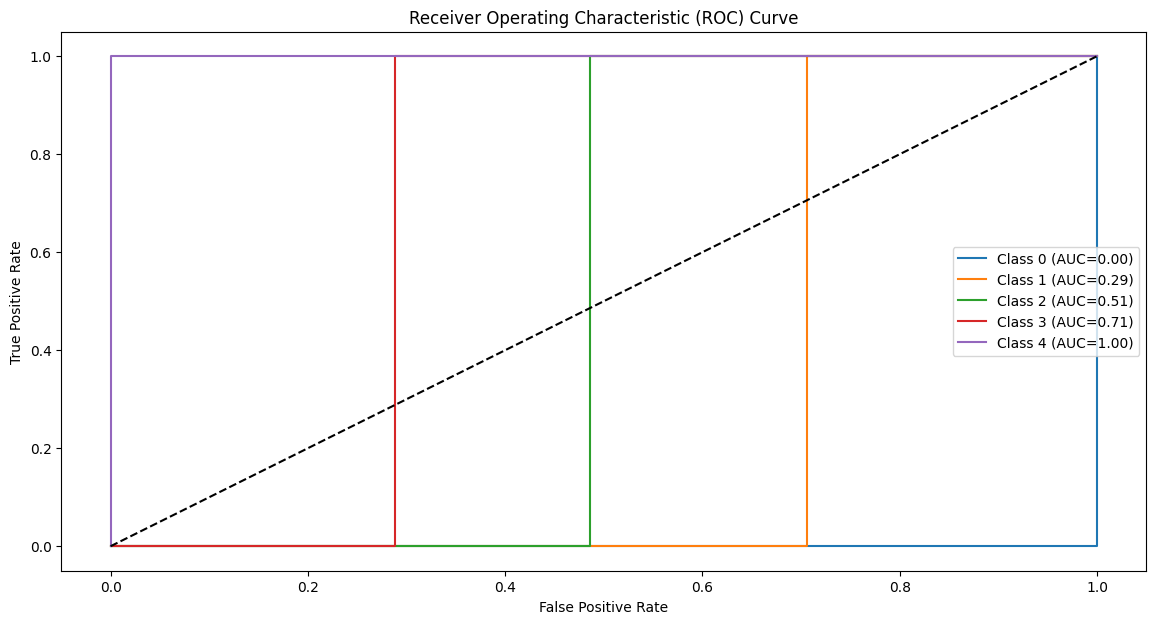

In [70]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score
import matplotlib.pyplot as plt

# Binarize the labels for multi-class classification
y_target_bin = label_binarize(y_target, classes=np.unique(y_source))

# Initialize lists to store precision-recall and ROC data
precision = []
recall = []
average_precision = []
fpr = []
tpr = []
roc_auc = []

# Compute precision-recall and ROC curves for each class
for i in range(y_target_bin.shape[1]):
    # Precision-Recall curve
    precision_i, recall_i, _ = precision_recall_curve(y_target_bin[:, i], final_predictions)
    precision.append(precision_i)
    recall.append(recall_i)
    average_precision.append(average_precision_score(y_target_bin[:, i], final_predictions))
    
    # ROC curve
    fpr_i, tpr_i, _ = roc_curve(y_target_bin[:, i], final_predictions)
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(auc(fpr_i, tpr_i))

# Plot Precision-Recall Curves
plt.figure(figsize=(14, 7))
for i in range(y_target_bin.shape[1]):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AP={average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Plot ROC Curves
plt.figure(figsize=(14, 7))
for i in range(y_target_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()